GRADIENT BOOSTING

BIBLIOTECAS

In [6]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [7]:
# Reprodutibilidade e Debugging
RANDOM_SEED = 42
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)


In [8]:
# Carregar os datasets
mitbih_train = pd.read_csv('mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('mitbih_test.csv', header=None)

# Separar features (X) e rótulos (y)
X_train = mitbih_train.iloc[:, :-1].values
y_train = mitbih_train.iloc[:, -1].values
X_test = mitbih_test.iloc[:, :-1].values
y_test = mitbih_test.iloc[:, -1].values


GRADIENT BOOSTING



In [9]:
gbc = GradientBoostingClassifier(random_state=42)
# Treinar o modelo
gbc.fit(X_train, y_train)# Inicializar o classificador Gradient Boosting com parâmetros padrão


# Fazer previsões
y_pred = gbc.predict(X_test)

In [11]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
# precisão (ou recall) definida como 0 quando não há amostras previstas para uma determinada classe
report = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(report)

Acurácia: 0.96
Relatório de Classificação:
             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98     18118
        1.0       0.94      0.58      0.71       556
        2.0       0.95      0.82      0.88      1448
        3.0       0.84      0.48      0.61       162
        4.0       0.98      0.92      0.95      1608

avg / total       0.96      0.96      0.96     21892



Treino: 87554
Teste:  21892
Total: 109446


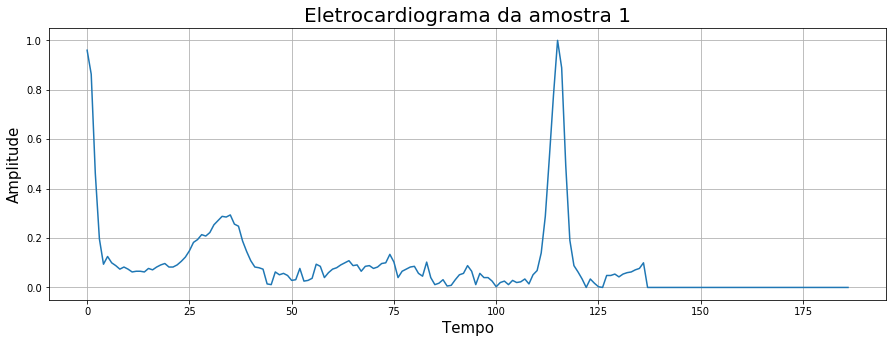

In [12]:
# Visualizar a amostra de ECG
index = 1  # Escolha o índice da amostra que deseja visualizar
ecg_sample = X_train[index]

print('Treino:', len(X_train))
print("Teste: ", len(X_test))
print('Total:', len(X_train) + len(X_test))

plt.figure(figsize=(15, 5))
plt.plot(ecg_sample)
plt.title(f'Eletrocardiograma da amostra {index}', fontsize=20)
plt.xlabel('Tempo', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.grid(True)
plt.show()

Classes únicas nos rótulos de treinamento: [0. 1. 2. 3. 4.]


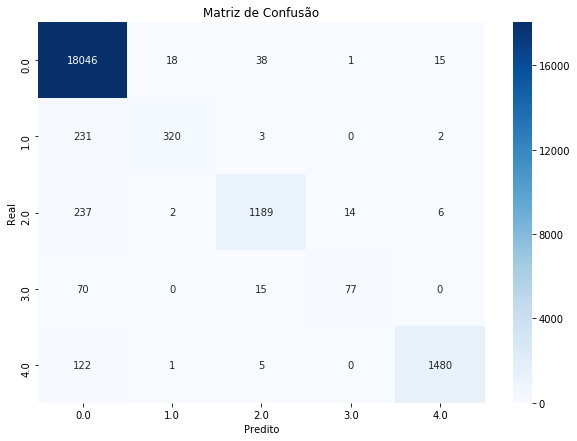

In [13]:

# Visualizar as classes únicas nos rótulos de treinamento
print("Classes únicas nos rótulos de treinamento:", np.unique(y_train))

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

GRIDSEARCH

In [14]:
# Definir o espaço de busca para os hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=RANDOM_SEED),
                           param_grid=param_grid,
                           cv=3,  # Número de folds para validação cruzada
                           scoring='accuracy',
                           n_jobs=-1,  # Usar todos os núcleos disponíveis
                           verbose=1)

In [ ]:
# Executar o GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [ ]:
# Obter os melhores parâmetros e o melhor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Melhores Parâmetros Encontrados:")
print(best_params)

In [ ]:
# Fazer previsões com o melhor modelo
y_pred = best_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(report)

In [ ]:
# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
